In [164]:
#Default Frameworks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing frameworks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Model Selection frameworks
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate

#ANN frameworks
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU

#Measurements
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# Load Dataset

In [53]:
data = pd.read_csv(r"C:\Users\cvveljanovski\Desktop\Learning\DataScience\Datasets\Hotel booking demand\hotel_bookings.csv")

In [54]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Dataset details

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [56]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [64]:
#Check if there are missing values
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Dataset cleanup and preparation

### 1. Empty values

#### a. Remove columns with many missing values because it is useless to populate them with our values and then impact on the result

In [69]:
#We are going to drop the features Agewnt and Company
data.drop(["agent"],inplace=True,axis=1)
data.drop(["company"],inplace=True,axis=1)

#### b. Features with small number of missing values can be filled with mean value or mode value to avoid impacting the balance of the dataset

In [59]:
# We are going to populate the missing values of the features: country and children but with what?
# Children can be populated with either mean or mode since there just 4 missing values, lets do that
data['children'] = data['children'].fillna(data['children'].mean())

In [63]:
# What about country, lets see the different values that are present in the feature
data.country.value_counts()

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BDI        1
VGB        1
BWA        1
PLW        1
SLE        1
Name: country, Length: 177, dtype: int64

In [62]:
# Seing this we can say that if we populate the missing values with the MODE should be OK since the diffrence between the top two countries is quite big
data['country'] = data['country'].replace({np.nan:'PRT'})

#### c. Drop duplicate features to reduce the dimensionality of the dataset

In [65]:
# Here we don't have duplicate features

### 2. String values to numerical

In [66]:
# Here all features that contain textual values will be encoded to contain numerical values since algorithms normally expect numerical input

In [78]:
# Lets take just the features that are of type object:
str_cat = data.select_dtypes(include=["object"])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [79]:
# I am going to use label encoding that will substitute each string value with a specific number
str_cat = str_cat.apply(LabelEncoder().fit_transform)

In [80]:
str_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,5,0,135,3,1,2,2,0,2,1,121
1,1,5,0,135,3,1,2,2,0,2,1,121
2,1,5,0,59,3,1,0,2,0,2,1,122
3,1,5,0,59,2,0,0,0,0,2,1,122
4,1,5,0,59,6,3,0,0,0,2,1,123


In [82]:
# We should now take also the features that are numerical and concatenate with the categorical features that we have encoded
num = data.select_dtypes(exclude=["object"])
num.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1


In [86]:
# Concatenate str_cat and num into one dataset that contains only numerical values for both categorical and continuous features
df = pd.concat([str_cat, num],axis=1)
df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1,5,0,135,3,1,2,2,0,2,...,0.0,0,0,0,0,3,0,0.0,0,0
1,1,5,0,135,3,1,2,2,0,2,...,0.0,0,0,0,0,4,0,0.0,0,0
2,1,5,0,59,3,1,0,2,0,2,...,0.0,0,0,0,0,0,0,75.0,0,0
3,1,5,0,59,2,0,0,0,0,2,...,0.0,0,0,0,0,0,0,75.0,0,0
4,1,5,0,59,6,3,0,0,0,2,...,0.0,0,0,0,0,0,0,98.0,0,1


### 3. Distribution analysis of the features

In [ ]:
# Now it will be good also to perform normalzation (i.e. to transform the values in the range from 0 to 1)
# But before we do the transformations lets analyse the distributions of the features

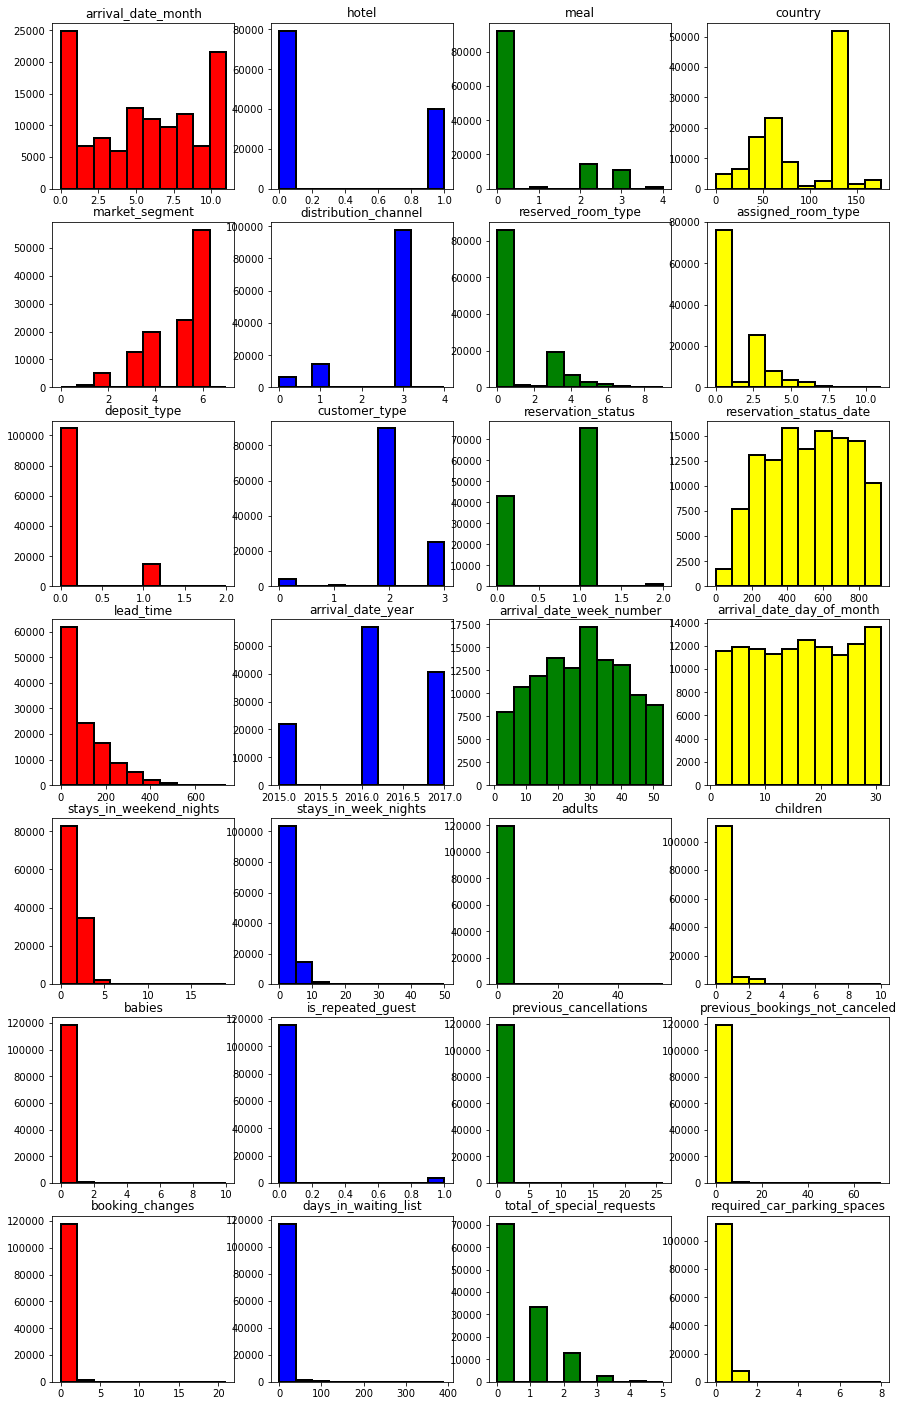

In [121]:
fig, axes = plt.subplots(7,4)
axes[0,0].hist(x="arrival_date_month", data=df, edgecolor="black", linewidth=2, color="red")
axes[0,0].set_title("arrival_date_month")
axes[0,1].hist(x="hotel", data=df, edgecolor="black", linewidth=2, color="blue")
axes[0,1].set_title("hotel")
axes[0,2].hist(x="meal", data=df, edgecolor="black", linewidth=2, color="green")
axes[0,2].set_title("meal")
axes[0,3].hist(x="country", data=df, edgecolor="black", linewidth=2, color="yellow")
axes[0,3].set_title("country")

axes[1,0].hist(x="market_segment", data=df, edgecolor="black", linewidth=2, color="red")
axes[1,0].set_title("market_segment")
axes[1,1].hist(x="distribution_channel", data=df, edgecolor="black", linewidth=2, color="blue")
axes[1,1].set_title("distribution_channel")
axes[1,2].hist(x="reserved_room_type", data=df, edgecolor="black", linewidth=2, color="green")
axes[1,2].set_title("reserved_room_type")
axes[1,3].hist(x="assigned_room_type", data=df, edgecolor="black", linewidth=2, color="yellow")
axes[1,3].set_title("assigned_room_type")

axes[2,0].hist(x="deposit_type", data=df, edgecolor="black", linewidth=2, color="red")
axes[2,0].set_title("deposit_type")
axes[2,1].hist(x="customer_type", data=df, edgecolor="black", linewidth=2, color="blue")
axes[2,1].set_title("customer_type")
axes[2,2].hist(x="reservation_status", data=df, edgecolor="black", linewidth=2, color="green")
axes[2,2].set_title("reservation_status")
axes[2,3].hist(x="reservation_status_date", data=df, edgecolor="black", linewidth=2, color="yellow")
axes[2,3].set_title("reservation_status_date")

axes[3,0].hist(x="lead_time", data=df, edgecolor="black", linewidth=2, color="red")
axes[3,0].set_title("lead_time")
axes[3,1].hist(x="arrival_date_year", data=df, edgecolor="black", linewidth=2, color="blue")
axes[3,1].set_title("arrival_date_year")
axes[3,2].hist(x="arrival_date_week_number", data=df, edgecolor="black", linewidth=2, color="green")
axes[3,2].set_title("arrival_date_week_number")
axes[3,3].hist(x="arrival_date_day_of_month", data=df, edgecolor="black", linewidth=2, color="yellow")
axes[3,3].set_title("arrival_date_day_of_month")

axes[4,0].hist(x="stays_in_weekend_nights", data=df, edgecolor="black", linewidth=2, color="red")
axes[4,0].set_title("stays_in_weekend_nights")
axes[4,1].hist(x="stays_in_week_nights", data=df, edgecolor="black", linewidth=2, color="blue")
axes[4,1].set_title("stays_in_week_nights")
axes[4,2].hist(x="adults", data=df, edgecolor="black", linewidth=2, color="green")
axes[4,2].set_title("adults")
axes[4,3].hist(x="children", data=df, edgecolor="black", linewidth=2, color="yellow")
axes[4,3].set_title("children")

axes[5,0].hist(x="babies", data=df, edgecolor="black", linewidth=2, color="red")
axes[5,0].set_title("babies")
axes[5,1].hist(x="is_repeated_guest", data=df, edgecolor="black", linewidth=2, color="blue")
axes[5,1].set_title("is_repeated_guest")
axes[5,2].hist(x="previous_cancellations", data=df, edgecolor="black", linewidth=2, color="green")
axes[5,2].set_title("previous_cancellations")
axes[5,3].hist(x="previous_bookings_not_canceled", data=df, edgecolor="black", linewidth=2, color="yellow")
axes[5,3].set_title("previous_bookings_not_canceled")

axes[6,0].hist(x="booking_changes", data=df, edgecolor="black", linewidth=2, color="red")
axes[6,0].set_title("booking_changes")
axes[6,1].hist(x="days_in_waiting_list", data=df, edgecolor="black", linewidth=2, color="blue")
axes[6,1].set_title("days_in_waiting_list")
axes[6,2].hist(x="total_of_special_requests", data=df, edgecolor="black", linewidth=2, color="green")
axes[6,2].set_title("total_of_special_requests")
axes[6,3].hist(x="required_car_parking_spaces", data=df, edgecolor="black", linewidth=2, color="yellow")
axes[6,3].set_title("required_car_parking_spaces")

fig.set_size_inches(15,25)

### 4. Normalization and Standardization of numerical features

In [124]:
# From the graphs above we can see that many of the features have scewed distribution of data so we need to normalize and 
# standardize the data

In [148]:
# Drop the output feature
df_standardized = df.drop("is_canceled",axis=1)
# Store the names of the columns in a list colls
colls = df_standardized.columns
colls

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [149]:
sc = StandardScaler()
df_standardized = sc.fit_transform(df_standardized)
df_standardized = pd.DataFrame(df_standardized)
df_standardized.columns = colls
df_standardized.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1.407224,-0.138765,-0.520068,0.936706,-1.522121,-1.746763,0.595363,0.356939,-0.373175,-0.237979,...,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,-0.131924,-2.015038,-0.254873,-0.720694
1,1.407224,-0.138765,-0.520068,0.936706,-1.522121,-1.746763,0.595363,0.356939,-0.373175,-0.237979,...,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,-0.131924,-2.015038,-0.254873,-0.720694
2,1.407224,-0.138765,-0.520068,-0.764841,-1.522121,-1.746763,-0.582996,0.356939,-0.373175,-0.237979,...,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.131924,-0.530935,-0.254873,-0.720694
3,1.407224,-0.138765,-0.520068,-0.764841,-2.311561,-2.848601,-0.582996,-0.707596,-0.373175,-0.237979,...,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.131924,-0.530935,-0.254873,-0.720694
4,1.407224,-0.138765,-0.520068,-0.764841,0.846200,0.456914,-0.582996,-0.707596,-0.373175,-0.237979,...,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.131924,-0.075810,-0.254873,0.540666


# 5. Split the dataset in training and testing

In [152]:
X = df_standardized
Y = df.is_canceled

In [155]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.5, random_state=0)

In [161]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=0)

# 6. Building the base model before optimizing it

In [165]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(8, activation='relu', kernel_initializer='he_uniform', input_dim=29))
# We can add also dropout to prevent overfitting
classifier.add(Dropout(0.1))
# Adding the second hidden layer
classifier.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
# Adding the output layer (output_dim is 1 as we want only 1 output from the final layer.)
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))

In [166]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [173]:
# Fitting the ANN to the Training set
model = classifier.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
5970/5970 [==============================] - 6s 973us/step - loss: 0.0020 - accuracy: 0.9991
Epoch 2/20
5970/5970 [==============================] - 6s 922us/step - loss: 0.0033 - accuracy: 0.9992
Epoch 3/20
5970/5970 [==============================] - 5s 906us/step - loss: 0.0028 - accuracy: 0.9991
Epoch 4/20
5970/5970 [==============================] - 6s 951us/step - loss: 0.0021 - accuracy: 0.9993
Epoch 5/20
5970/5970 [==============================] - 6s 924us/step - loss: 0.0025 - accuracy: 0.9992
Epoch 6/20
5970/5970 [==============================] - 7s 1ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 7/20
5970/5970 [==============================] - 8s 1ms/step - loss: 0.0024 - accuracy: 0.9992
Epoch 8/20
5970/5970 [==============================] - 7s 1ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 9/20
5970/5970 [==============================] - 6s 958us/step - loss: 0.0022 - accuracy: 0.9992
Epoch 10/20
5970/5970 [==============================] - 5s 899us/step

In [174]:
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


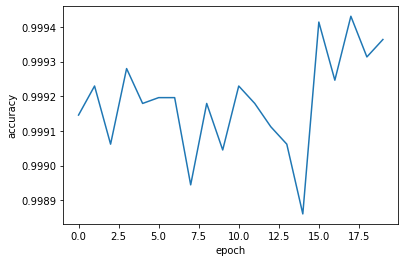

In [175]:
plt.plot(model.history['accuracy'])
#plt.plot(model.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
#plt.legend(['train','validation'], loc = 'upper left')
plt.show()

In [176]:
# Fitting the ANN to the validation set
model_val = classifier.fit(X_val, y_val, batch_size=10, epochs=20)

Epoch 1/20
4000/4000 [==============================] - 6s 1ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 2/20
4000/4000 [==============================] - 6s 1ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 3/20
4000/4000 [==============================] - 6s 1ms/step - loss: 0.0021 - accuracy: 0.9991
Epoch 4/20
4000/4000 [==============================] - 6s 2ms/step - loss: 0.0014 - accuracy: 0.9994
Epoch 5/20
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 6/20
4000/4000 [==============================] - 9s 2ms/step - loss: 0.0036 - accuracy: 0.9989
Epoch 7/20
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 8/20
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0034 - accuracy: 0.9992: 0s - loss: 0.0034 - accuracy: 0.
Epoch 9/20
4000/4000 [==============================] - 7s 2ms/step - loss: 0.0029 - accuracy: 0.9991
Epoch 10/20
4000/4000 [========================

In [177]:
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


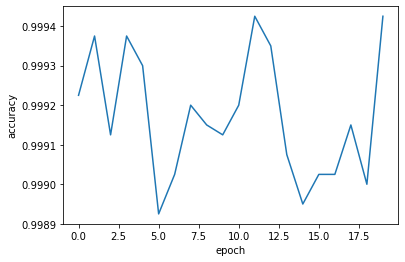

In [178]:
plt.plot(model_val.history['accuracy'])
#plt.plot(model.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
#plt.legend(['train','validation'], loc = 'upper left')
plt.show()